(321, 481)
[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198, 216, 234, 252, 270, 288, 306, 321]
[3, 3, 2, 2, 2, 2, 2, 2]
[[ 0 , 54 ],[ 54 , 108 ],[ 108 , 144 ],[ 144 , 180 ],[ 180 , 216 ],[ 216 , 252 ],[ 252 , 288 ],[ 288 , 321 ]]

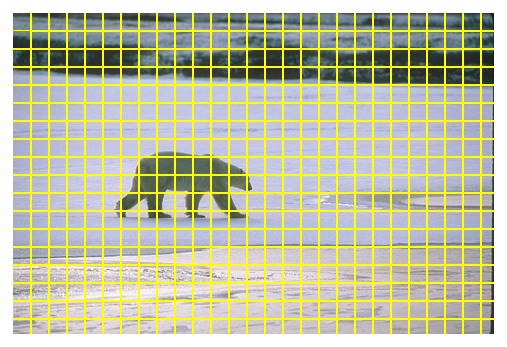

(321, 481)
[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198, 216, 234, 252, 270, 288, 306, 321]
[3, 3, 2, 2, 2, 2, 2, 2]
[[ 0 , 54 ],[ 54 , 108 ],[ 108 , 144 ],[ 144 , 180 ],[ 180 , 216 ],[ 216 , 252 ],[ 252 , 288 ],[ 288 , 321 ]]

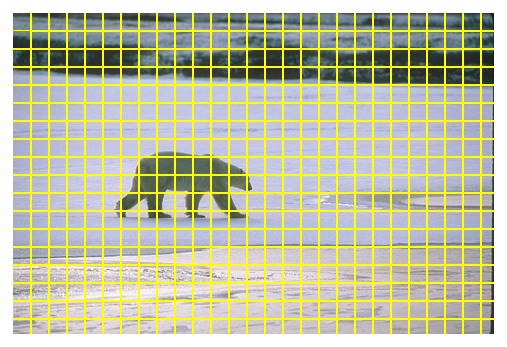

(321, 481)
[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198, 216, 234, 252, 270, 288, 306, 321]
[3, 3, 2, 2, 2, 2, 2, 2]
[[ 0 , 54 ],[ 54 , 108 ],[ 108 , 144 ],[ 144 , 180 ],[ 180 , 216 ],[ 216 , 252 ],[ 252 , 288 ],[ 288 , 321 ]]

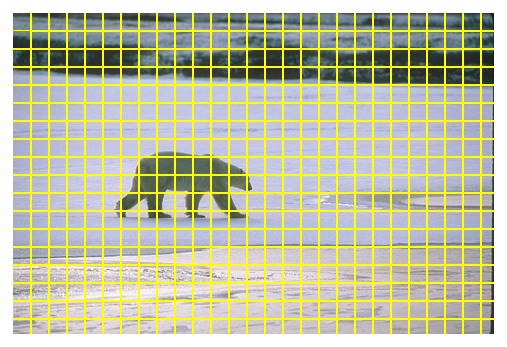

In [49]:
# USAGE
# python2.7 superpixel.py --image raptors.png

# import the necessary packages
from skimage.segmentation.slic_superpixelsO import slicO
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from PIL import Image
import sys

## construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()

# ap.add_argument("-i", "--image", required = True, help = "Path to the image")
# args = vars(ap.parse_args())
## load the image and convert it to a floating point data type
# image = img_as_float(io.imread(args["image"]))

#path of image
#impath = sys.argv[1]


path = "/home/gangmin/experiment/data/images/test"
file_list = os.listdir(path)
file_list_img = [file for file in file_list if file.endswith(".jpg")]


# loop over the number of segments
numSegments = 500
tempnum = 0
for img_name in file_list_img:
    
    name = img_name[:-4]
    name = '100007'
    
    #read image
    img = Image.open(path +'/'+ name+ '.jpg')

    image = img_as_float(img)
    #print(image)
    (img_w,img_h) = img.size
    
    
    
    segments = slicO(image, n_segments = numSegments, sigma = 5)
    print(segments.shape)
    #print(segments[0])
    
    
    
    
    
    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    # image split list 생성
    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    
    init_list = []
    dist_list = []
    for i,v in enumerate(segments):
        if v[0] not in init_list:
            init_list.append(v[0])
            dist_list.append(i)
    #ilist 생성
    partition = 8
    height = len(init_list)
    temp = height//partition
    remain = height%partition
    split_list =[]
    for i in range(partition):
        split_list.insert(0,temp)
        if remain is not 0:
            split_list[0] = split_list[0]+1
            remain -=1
    index = 0
    split_list.sort(reverse=True)
    for i in range(partition):
        index += split_list[i]
    
    index = 0
    dist_list.append(img_h)
    
    print(dist_list)
    print(split_list)
    
    print("[",end="")
    for e,i in enumerate(split_list):
        first = dist_list[index]
        index += i
        last = dist_list[index]
        print("[",first,",", last,"]",end="")
        if e != len(split_list)-1:
            print(",",end="")
        else:
            print("]",end="")
        
        
    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

    
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments),dpi = 96,figsize = (img_w/96,img_h/96))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    plt.axis("off")
    plt.show()
    
    tempnum +=1
    if tempnum == 3:
        break

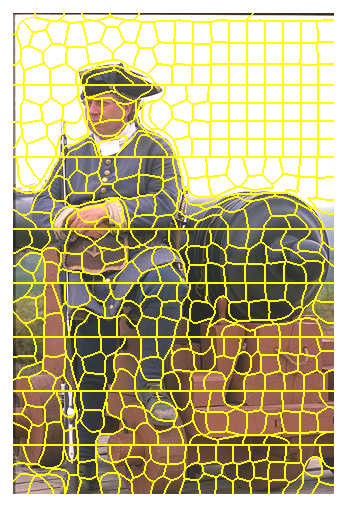

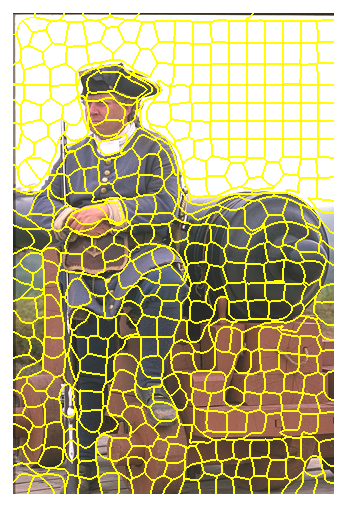

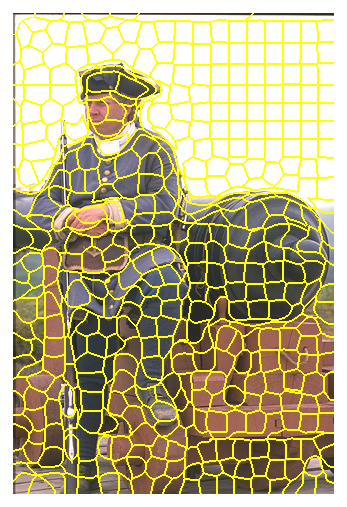

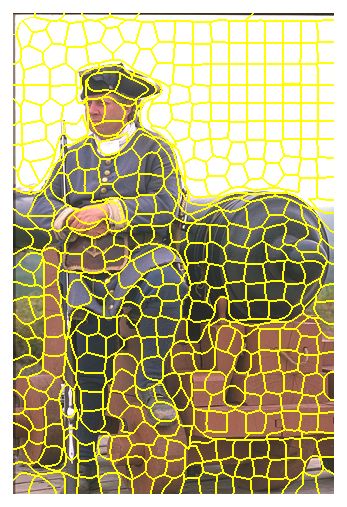

In [1]:
# USAGE
# MR-SLIC_original
from pyspark.context import SparkContext
from skimage.segmentation import mark_boundaries
from skimage import io
import collections as coll
import time
from scipy import ndimage as ndi
from skimage.segmentation import slic
from PIL import Image
from skimage.util import img_as_float
import numpy as np
from skimage.segmentation._slic_master import _slic_cythonM
from skimage.segmentation._slic import _enforce_label_connectivity_cython
from skimage.color import rgb2lab
import os

#number of overlap(0, 20, 40, 60, 80)
overlap =10
#목표 세그먼트
OriginSegments = 1000
folder = 'test'


path = "/home/gangmin/experiment/data/images/"+folder
file_list = os.listdir(path)
file_list_img = [file for file in file_list if file.endswith(".jpg")]

#split size
# 폴더는 overlap+1
#number of partition


for OriginSegments in [500,1000,1500,2000]:
    for overlap in [0,1,2,3]:

        partition = 8
        testnum = 0
        for img_name in file_list_img:
            
            name = img_name[:-4]
            #원본 이미지 메타데이터(결과 출력용)
            images = Image.open(path+'/'+img_name)
            #원본 이미지 크기
            (img_w,img_h) = images.size
            depth = 1


            #grid 분할하는데 필요한 정보
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
            if img_h == 321:
                img_shape = 'w'
            elif img_h == 481:
                img_shape = 'h'
            
            
            if img_shape == 'h':
                if OriginSegments == 500:
                    pi_list = [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 13]
                    sp_list = [4, 4, 4, 3, 3, 3, 3, 3]
                    seg_h =27
                    seg_w = 18
                elif OriginSegments == 1000:
                    pi_list = [13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
                    sp_list = [5, 5, 5, 5, 5, 5, 5, 5]
                    seg_h =40
                    seg_w = 27
                elif OriginSegments == 1500:
                    pi_list = [11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
                    sp_list = [6, 6, 6, 6, 6, 6, 6, 6]
                    seg_h =48
                    seg_w = 32
                elif OriginSegments == 2000:
                    pi_list = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13]
                    sp_list = [7, 7, 7, 7, 7, 6, 6, 6]
                    seg_h =53
                    seg_w = 36
            else:
                if OriginSegments == 500:
                    pi_list = [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 15]
                    sp_list = [3, 3, 2, 2, 2, 2, 2, 2]
                    seg_h =18
                    seg_w = 27
                elif OriginSegments == 1000:
                    pi_list = [13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 8]
                    sp_list = [4, 4, 4, 3, 3, 3, 3, 3]
                    seg_h =27
                    seg_w = 40
                elif OriginSegments == 1500:
                    pi_list = [11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
                    sp_list = [4, 4, 4, 4, 4, 4, 4, 4]
                    seg_h =32
                    seg_w = 48
                elif OriginSegments == 2000:
                    pi_list = [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6]
                    sp_list = [5, 5, 5, 5, 4, 4, 4, 4]
                    seg_h =36
                    seg_w = 53
                    
            #mapping 하는데 필요한 k 및 lsit 만들기
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
                        
            
            #ilist 생성
            imsi = 0
            split_list = []
            for i in range(partition):
                split_temp = 0
                for j in range(imsi,imsi+sp_list[i]):
                    split_temp += pi_list[j]
                split_list.append(split_temp)
                imsi += sp_list[i]
            
            index = 0
            listi = []
            for i in range(partition):
                listi.append(index)
                index += split_list[i]
            #file list
            k=[]
            for i in range(partition):
                if i==0 or i == partition-1:
                    k.append([name+'_'+str(i),sp_list[i]*seg_w+overlap*seg_w])
                else:
                    k.append([name+'_'+str(i),sp_list[i]*seg_w+overlap*seg_w*2])
            
            #print(k)
               
            #slavenode 작업 전달
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
               

            #이미지를 float으로 변환
            images = img_as_float(images)
            #map 함수
            def Map(k):
                #time check
                start_time = time.time()
                
                img = Image.open('/home/gangmin/experiment/data/grid_images/'+str(OriginSegments)+'/'+str(overlap)+'/'+ k[0] +'.jpg')
                image = img_as_float(img)
                
                segments,distances = slic(image, n_segments = k[1], sigma = 5)
                
                finish_time = time.time()
                
                return segments, distances, start_time, finish_time, k[0][-1]
            #times, segments, distances 를 리턴받는다.
            stime = time.time()
            datas = sc.parallelize(k,partition).map(Map).collect()

            ftime = time.time()
            
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

           
            #원본 이미지 메타데이터로 dimension 전송
            dimension = [depth,img_h,img_w]
            dimension = np.ascontiguousarray(dimension)

            #segments, distances 리스트 만들기
            indlist = [[],[]]
            tempindex = 0
            for i in datas:

                indlist[0] += [int(i[4])]
                indlist[1].append(i[0][np.newaxis,:][0].shape[0])
                if tempindex is 0:
                    seg_array = i[0][np.newaxis,:][0]
                    dist_array = i[1][0]
                else:
                    seg_array = np.r_[seg_array,i[0][np.newaxis,:][0]]
                    dist_array = np.r_[dist_array,i[1][0]]

                tempindex +=1

            # array broadcast 불가 -> 합쳐서 전송하고 다시 분리    
            # 분리할때 인덱스대로 분리하고 겉에 []를 씌워줘서 3차원 형태로 만들어야함
            #바뀐점은 한줄로 펴진 array형태로 전달하고, indlist에서 한차원 늘어남.

            #slic_master - 취합 코드
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
            
            nearest_segmentsO \
                = np.empty((depth, img_h, img_w), dtype=np.intp)
            distanceO \
                = np.empty((depth, img_h, img_w), dtype=np.double)
            distanceO[:, :, :] = np.full((depth, img_h, img_w), 999, dtype=np.double)
            n_node = np.array(indlist[0]).shape[0]

            #extension = int(split_list[i]*percent/100)
            import math
            for i in range(n_node):
                indlist[0][i] = listi[indlist[0][i]]
            sp_acc=[]
            acc_temp = 0
            for v in sp_list:
                sp_acc.append(acc_temp)
                acc_temp += v
            if overlap !=0:
                #새로운 코드
                #cython 코드 짤 때 가변성 없얘기
                temp = 0
                empty =[]
                boundary = np.array(empty)
                for i in range(0,n_node):
                    z_min = 0
                    y_min = indlist[0][i]
                    for z in range(z_min,z_min+1):
                        start = 0
                        last = img_h
                        if i!=0 :
                            start = y_min-pi_list[sp_acc[i]-1]
                        if i!= n_node-1:
                            last = y_min+split_list[i]+pi_list[sp_acc[i+1]]
                        
                        extension = 0
                        for o in range(overlap):
                            if o !=0: 
                                extension += pi_list[sp_acc[i]-o-1]

                        for y in range(start,last):                             
                            for x in range(0, img_w):
                                if i == 0:
                                    distanceO[z,y,x] = dist_array[y,x]
                                    nearest_segmentsO[z,y,x] = seg_array[y,x]
                                else:
                                    if (y>=start and y<y_min+pi_list[sp_acc[i]]) and nearest_segmentsO[z,y,x] in boundary:
                                        pass
                                        #nearest_segmentsO[z,y,x] = 999
                                    else:
                                        distanceO[z,y,x] = dist_array[temp+y-start+extension,x]
                                        nearest_segmentsO[z,y,x] = seg_array[temp+y-start+extension,x]
                                
                                if   i!= n_node-1 and y == y_min+split_list[i]-pi_list[sp_acc[i+1]-1]:
                                    if x ==0:
                                        #초기화
                                        boundary = np.array(empty)
                                    boundary = np.append(boundary,nearest_segmentsO[z,y,x])

                    
                    temp += indlist[1][i]

                result = nearest_segmentsO
            else:   
                result = np.ascontiguousarray(seg_array[np.newaxis,:])
            fftime = time.time()
            
            #test 출력
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
            '''
            fig = plt.figure("Superpixels -- %d segments" % (OriginSegments),dpi = 96,figsize = (img_w/96,img_h/96))
            ax = fig.add_subplot(1, 1, 1)
            ax.imshow(mark_boundaries(images, result[0]))
            plt.xticks([]), plt.yticks([])
            plt.tight_layout()
            plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)

            #plt.savefig('/home/gangmin/image-resource/result.png',bbox_inces='tight',pad_inches=0)

            plt.axis("off")

            # show the plots
            plt.show()
            '''
            
            #label 결속 처리
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
            
            if 1:
                segment_size = depth * img_h * img_w / OriginSegments
                min_size = int(0.5 * segment_size)
                max_size = int(3 * segment_size)
                labels = _enforce_label_connectivity_cython(result,min_size,max_size)

            #slic_master - 시간체크
            #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


            #time check
            import pandas as pd
            data = pd.DataFrame(columns=['node','time'])
            number = 0
            node = 1
            datat = pd.DataFrame(columns=['node','time'])
            pd.options.display.float_format = '{:.6f}'.format
            for i in datas:
                datat.loc[number]=['node '+str(node),i[3]-i[2]]

                data.loc[number]=['node '+str(node)+' start',i[2]]
                number += 1
                data.loc[number]=['node '+str(node)+' finish',i[3]]
                number += 1
                node+=1
            data = data.sort_values(by=['time'], axis=0)






            import matplotlib.pyplot as plt
            #save result
            fig = plt.figure("Superpixels -- %d segments" % (OriginSegments),dpi = 96,figsize = (img_w/96,img_h/96))
            ax = fig.add_subplot(1, 1, 1)
            ax.imshow(mark_boundaries(images, labels[0]))
            plt.xticks([]), plt.yticks([])
            plt.tight_layout()
            plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)

            #plt.savefig('/home/gangmin/image-resource/result.png',bbox_inces='tight',pad_inches=0)

            plt.axis("off")

            # show the plots
            plt.show()

            #df = pd.DataFrame(labels[0])
            #df.to_csv('/home/gangmin/experiment/mrslic/exp2/'+folder+'/'+str(overlap)+'/'+img_name[:-4]+".csv",header=None,index=None)
            testnum += 1
            if testnum == 1:
                break
            
    break

